# Helmholtz 1D: Find $kh$, $L$ such that the problem is singular
We discretize the 1D Helhmholtz operator with constant k using repetitive coarsening on a domain of size $L$.

In our experiments we use the 5-point finite difference $A^h = [-1, 16, -30 + 12 (kh)^2, 16, -1]$. Here we compare it with $A^h = [1, -2 + (kh)^2, 1]$.

Fix $h = 1$ and $L = n$ = #gridpoints. Find a value of $k$ for which the problem is singular (i.e., the discrete solution's wavelength divides $L$).

In [73]:
import collections
import logging
import numpy as np
import matplotlib.pyplot as plt
import helmholtz as hm
import helmholtz.analysis
from scipy.optimize import fsolve
from scipy.linalg import eig, norm, svd
from scipy.sparse.linalg import eigs

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=500, precision=5, suppress=True, threshold=100000)
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)-8s %(message)s",
                    datefmt="%a, %d %b %Y %H:%M:%S")

logger = logging.getLogger("main")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
kh, lam = hm.analysis.ideal.find_singular_kh("5-point", 96)
print("kh", kh, "lam", lam)

kh 0.5233853805513017 lam 5.184006456805363e-16


In [89]:
a = hm.linalg.helmholtz_1d_discrete_operator(kh, "5-point", n)
v = np.real(eigs(hm.linalg.helmholtz_1d_discrete_operator(kh, "5-point", n), 1, which="SM")[1])

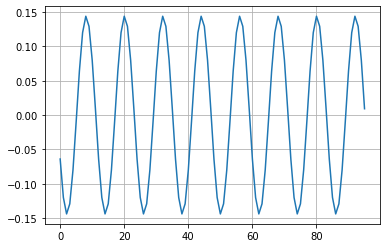

In [88]:
plt.plot(v)
plt.grid(True);

In [103]:
n_values = np.arange(30, 100)
kh3 = np.array([hm.analysis.ideal.find_singular_kh("3-point", n)[0] for n in n_values])
kh5 = np.array([hm.analysis.ideal.find_singular_kh("5-point", n)[0] for n in n_values])

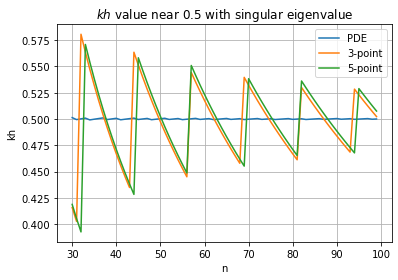

In [108]:
plt.plot(n_values, (2*np.pi*n_values)/(2 * np.round((2*np.pi*n_values))), label="PDE")
plt.plot(n_values, kh3, label="3-point")
plt.plot(n_values, kh5, label="5-point")
plt.grid(True);
plt.xlabel("n")
plt.ylabel("kh")
plt.title("$kh$ value near $0.5$ with singular eigenvalue");
plt.legend();